In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest) = datasets.mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
ytrain.shape

(60000,)

In [5]:
ytrain[:3]

array([5, 0, 4], dtype=uint8)

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
xtrain[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [8]:
ytrain[2]

4

In [9]:
def plotimage(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(y[index])

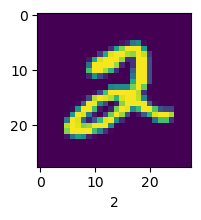

In [10]:
plotimage(xtrain,ytrain,5)

In [11]:
# normalizing the pixels
xtrain = xtrain/255
xtest = xtest/255
xtrain[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
xtrain = xtrain.reshape(-1, 28,28,1)

In [13]:
xtest = xtest.reshape(-1,28,28,1
                     )

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters = 28, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 56, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(56, activation='relu'),
    layers.Dense(10, activation = 'softmax')
    
    
])

/Users/kamakshi/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-08 01:00:16.617662: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-08 01:00:16.617717: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-08 01:00:16.617729: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-08 01:00:16.617775: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-08 01:00:16.617804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replic

In [15]:
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
cnn.fit(xtrain,ytrain, epochs = 5)

Epoch 1/5


2024-06-08 01:01:07.635594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8956 - loss: 0.3340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9844 - loss: 0.0502
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9880 - loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9919 - loss: 0.0258
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9943 - loss: 0.0188


In [17]:
cnn.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9876 - loss: 0.0382


[0.02821262739598751, 0.9907000064849854]

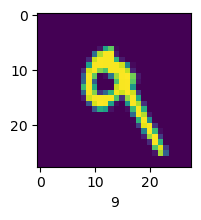

In [19]:
plotimage(xtest,ytest,7)

In [20]:
ypred = cnn.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
ypred = [np.argmax(element) for element in ypred]

In [23]:
ypred[:3]

[7, 2, 1]

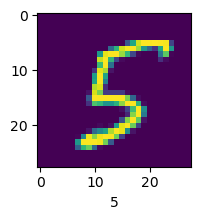

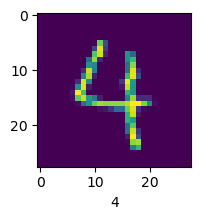

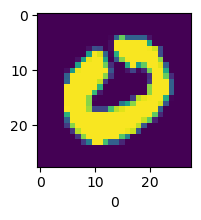

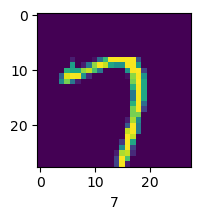

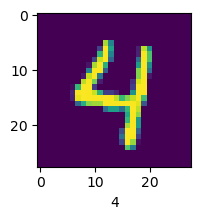

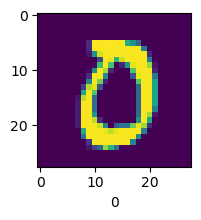

In [25]:
for i in range(23,29):
    plotimage(xtest,ypred,i)